In [13]:
%matplotlib notebook

import numpy as np
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider

#### Creating training set and plot results


In [2]:
W_true = [1.7, -5, 3]
m = 256
noise = np.random.rand(m) * 30
X_train = np.linspace(-10, 10, m)  + np.random.randn(m)
Y_train = W_true[0]*X_train**2 + W_true[1]*X_train +  W_true[2] + noise

<IPython.core.display.Javascript object>


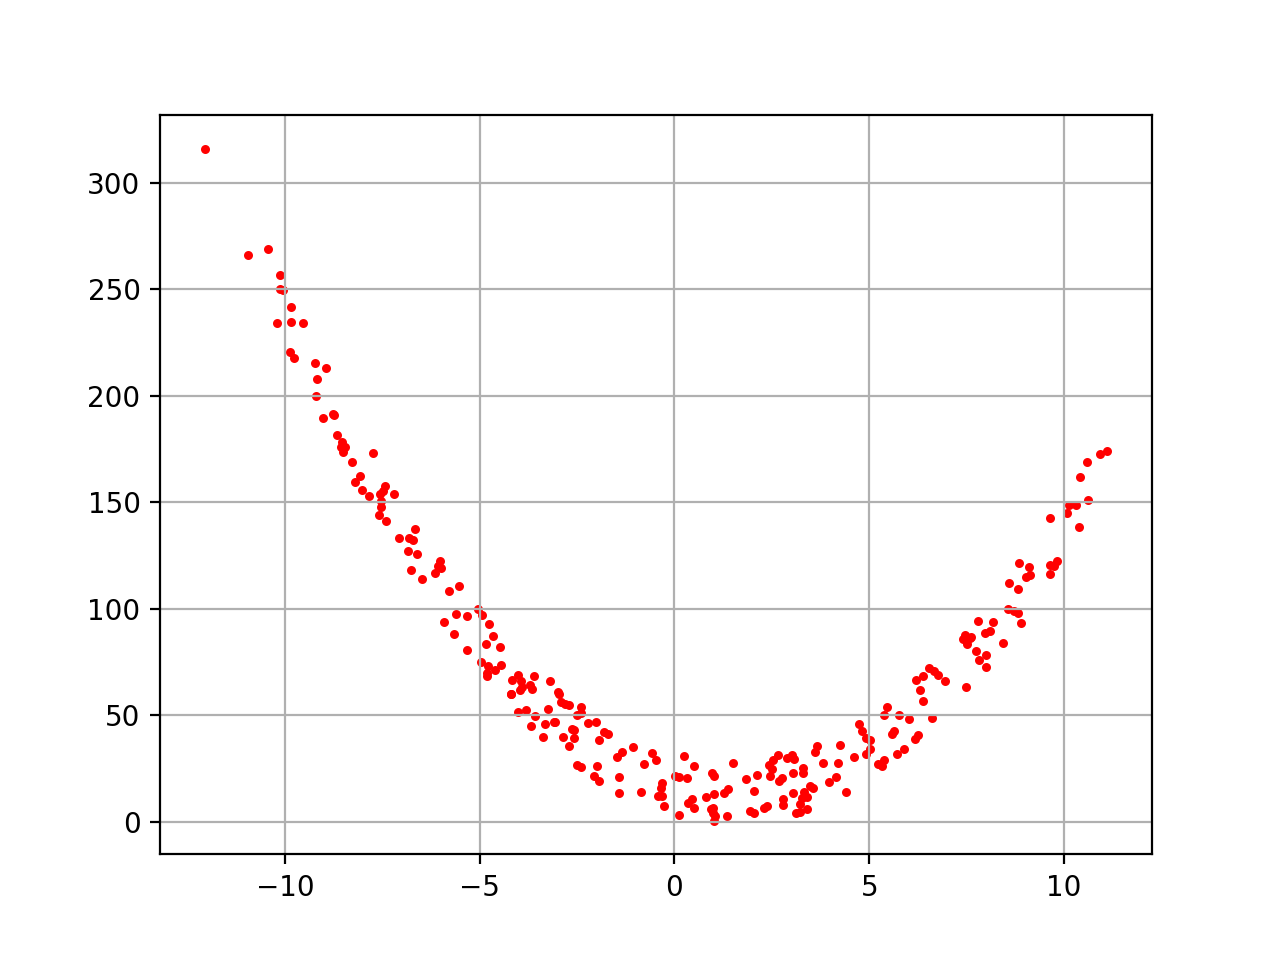

In [3]:
fig, ax = plt.subplots()
ax.grid()
scatter = ax.scatter(X_train,Y_train, s=5, c='r')

#### Initialize  variables & placeholders

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='X')
Y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='Y')

W = tf.Variable(np.random.rand(3,1), name='weights', dtype=tf.float32)
predictions = (W[0] * X**2) + (W[1] * X) + W[2]

In [5]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [6]:
cost = tf.losses.mean_squared_error(labels=Y, predictions=predictions)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00002).minimize(cost)

In [7]:
W_adjustments = [W.eval().tolist()]
print('Initialized weights: {}'.format(W.eval().reshape(-1)))
print('True weights: {}'.format(W_true))

Initialized weights: [0.19193669 0.29945475 0.9385963 ]
True weights: [1.7, -5, 3]


In [8]:
for i in range(1000):
    sess.run([cost, optimizer], feed_dict={Y: Y_train.reshape(m, 1), X: X_train.reshape(m,1)})
    if i % 2==0:
        W_adjustments.append(W.eval())

In [9]:
def update_plot(change):
    _W = W_adjustments[int(slider.value)]
    _ys = _W[0]*X_test**2 + _W[1]*X_test + _W[2]
    parabola.set_ydata(_ys) 

    
slider = FloatSlider(value=0, min=0, max=len(W_adjustments) -1, step=1, description='iteration per 2')
slider.observe(update_plot, 'value')

<IPython.core.display.Javascript object>


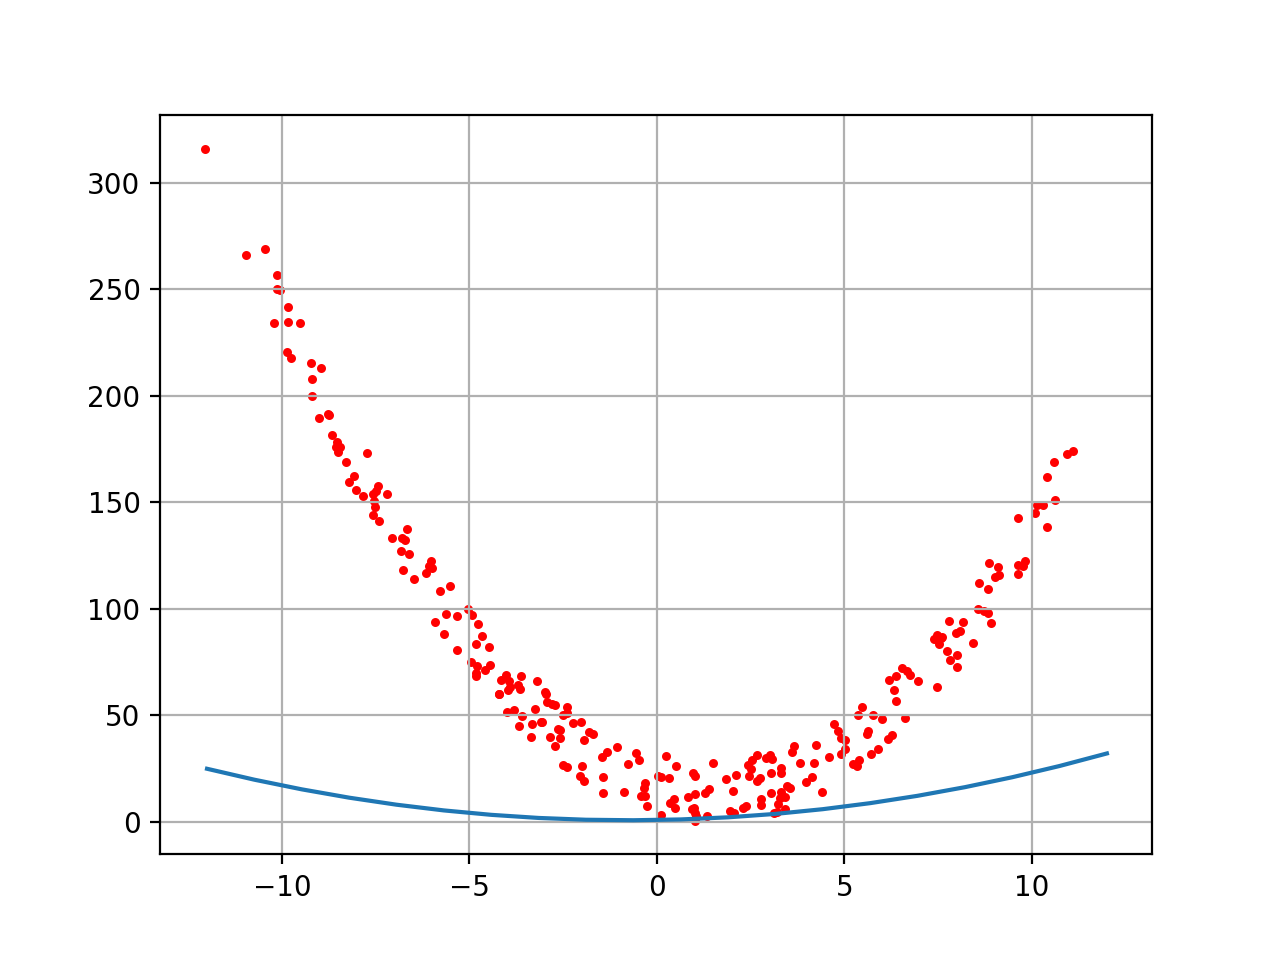

In [10]:
fig, ax = plt.subplots()
ax.grid()
scatter = ax.scatter(X_train,Y_train, s=5, c='r')
X_test = np.linspace(-12, 12, 20)
W_temp = W_adjustments[0]
Y_test = W_temp[0]*X_test**2 + W_temp[1]*X_test + W_temp[2]
parabola, = ax.plot(X_test, Y_test)

In [11]:
slider

FloatSlider(value=0.0, description='iteration per 2', max=500.0, step=1.0)

In [12]:
print('Trained weights: {}'.format(W_adjustments[-1].reshape(-1).tolist()))
print('True weights: {}'.format(W_true))

Trained weights: [1.9413936138153076, -3.6527297496795654, 1.2868770360946655]
True weights: [1.7, -5, 3]
